# Introduction To Merging Datasets

Merge allows you to merge specific values from one dataframe to another. For example let's say you have some sales data. The data includes the product id, the price it sold for, and the date of sale. This dataframe is 20,000 rows and 3 columns. You have another dataframe with the product id and the matching product name, this dataframe is only 10 rows (because you are only selling 10 products) and 2 columns.  You can join the product names dataframe to the product sales dataframe.

This is a lot like a SQL join, and there is a pandas method called join, but I prefer merge because it is more flexible - it does everything join does but more. (In fact, merge is the underlying function that join uses)


# Merging The Labor Sheet Data With The Data Of  Nearby Weather Station To See If Weather Affects Sales


In [1]:
import pandas as pd
import os

# We are going to producea plot below, in order to show the plot in the
# notebook we must use the following magic command.
%matplotlib inline

## Load The Labor Sheet Data

In [2]:
filepath = os.path.join(os.getcwd(), 'data', 'ShiftManagerApp_LaborSheet.csv')

labor_sheet_data = pd.read_csv(filepath, parse_dates=[['Date', 'Ending_Hour'], 'Timestamp'])
labor_sheet_data.head(2)

,Date_Ending_Hour,Store_ID,Manager,Projected_Sales,Sales,DT_TTL,Car_Count,KVS_Total,Scheduled_People,Actual_People,Reason_for_Labor_Diff,Reason_for_High_TTLs,Manager_Entering_Data,Timestamp,OEPE,Park_Percentage
0,2017-01-23 08:00:00,4462,JillianA,540.0,420.0,170.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,2017-01-23 09:52:14,NaN,NaN
1,2017-02-05 06:00:00,4462,ZoeyD,90.0,155.0,114.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,2017-02-05 11:30:48,NaN,NaN


## Select The Labor Sheet Data for Store 4462

In [3]:
store_data = labor_sheet_data.loc[labor_sheet_data['Store_ID'] == 4462, :]
store_data.head(2)

,Date_Ending_Hour,Store_ID,Manager,Projected_Sales,Sales,DT_TTL,Car_Count,KVS_Total,Scheduled_People,Actual_People,Reason_for_Labor_Diff,Reason_for_High_TTLs,Manager_Entering_Data,Timestamp,OEPE,Park_Percentage
0,2017-01-23 08:00:00,4462,JillianA,540.0,420.0,170.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,2017-01-23 09:52:14,NaN,NaN
1,2017-02-05 06:00:00,4462,ZoeyD,90.0,155.0,114.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,2017-02-05 11:30:48,NaN,NaN


## Load Weather Data For A Station Near The Store

In [4]:
headers = ['Year', 'Month', 'Day', 'Hour', 'Air Temp', 'Dew Point Temp', 'Sea Level Pressure',
           'Wind Direction', 'Wind Speed Rate',
           'Sky Condition Total Coverage Code',
           'Liquid Precipitation Depth Dimension - 1Hr Duration',
           'Liquid Precipitation Depth Dimension - Six Hour Duration']

filepath = os.path.join(os.getcwd(), 'data', '726945-24202-2017')
weather_data = pd.read_csv(filepath, delim_whitespace=True,
                          names=headers, parse_dates=[['Year', 'Month', 'Day',
                                                       'Hour']])

In [5]:
weather_data.head(3)

,Year_Month_Day_Hour,Air Temp,Dew Point Temp,Sea Level Pressure,Wind Direction,Wind Speed Rate,Sky Condition Total Coverage Code,Liquid Precipitation Depth Dimension - 1Hr Duration,Liquid Precipitation Depth Dimension - Six Hour Duration
0,2017-01-01 08:00:00,10,-10,-9999,0,0,-9999,-9999,-9999
1,2017-01-01 09:00:00,30,10,-9999,190,31,-9999,-9999,-9999
2,2017-01-01 10:00:00,30,10,-9999,170,46,-9999,-9999,-9999


## Convert The 'Air Temp' Column to Fahrenheit.

In [6]:
weather_data.loc[:, 'Air Temp'] = (weather_data['Air Temp']/10)*(9/5)+32
weather_data.head(3)

,Year_Month_Day_Hour,Air Temp,Dew Point Temp,Sea Level Pressure,Wind Direction,Wind Speed Rate,Sky Condition Total Coverage Code,Liquid Precipitation Depth Dimension - 1Hr Duration,Liquid Precipitation Depth Dimension - Six Hour Duration
0,2017-01-01 08:00:00,33.8,-10,-9999,0,0,-9999,-9999,-9999
1,2017-01-01 09:00:00,37.4,10,-9999,190,31,-9999,-9999,-9999
2,2017-01-01 10:00:00,37.4,10,-9999,170,46,-9999,-9999,-9999


In [7]:
store_data.head(2)

,Date_Ending_Hour,Store_ID,Manager,Projected_Sales,Sales,DT_TTL,Car_Count,KVS_Total,Scheduled_People,Actual_People,Reason_for_Labor_Diff,Reason_for_High_TTLs,Manager_Entering_Data,Timestamp,OEPE,Park_Percentage
0,2017-01-23 08:00:00,4462,JillianA,540.0,420.0,170.0,NaN,100.0,NaN,NaN,NaN,NaN,NaN,2017-01-23 09:52:14,NaN,NaN
1,2017-02-05 06:00:00,4462,ZoeyD,90.0,155.0,114.0,NaN,78.0,NaN,NaN,NaN,NaN,NaN,2017-02-05 11:30:48,NaN,NaN


## Merge the Weather_Data DataFrame with the Store_4462 DataFrame
We call `.merge()` as a method on the store_data DataFrame and pass weather_data as the first argument.  We use the arguments 'left_on' and 'right_on' to indicate which columns we want to join the datasets on.  We use the 'how' argument to specify if we'd like an inner, outer, left, or right join.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

In [8]:
merged_data = store_data.merge(weather_data, left_on='Date_Ending_Hour',
                                right_on='Year_Month_Day_Hour', how='inner')
merged_data.head(5)

,Date_Ending_Hour,Store_ID,Manager,Projected_Sales,Sales,DT_TTL,Car_Count,KVS_Total,Scheduled_People,Actual_People,...,Park_Percentage,Year_Month_Day_Hour,Air Temp,Dew Point Temp,Sea Level Pressure,Wind Direction,Wind Speed Rate,Sky Condition Total Coverage Code,Liquid Precipitation Depth Dimension - 1Hr Duration,Liquid Precipitation Depth Dimension - Six Hour Duration
0,2017-01-23 08:00:00,4462,JillianA,540.0,420.0,170.0,NaN,100.0,NaN,NaN,...,NaN,2017-01-23 08:00:00,35.6,10,-9999,0,0,-9999,-9999,-9999
1,2017-02-05 06:00:00,4462,ZoeyD,90.0,155.0,114.0,NaN,78.0,NaN,NaN,...,NaN,2017-02-05 06:00:00,48.2,70,-9999,170,62,-9999,-9999,-9999
2,2017-02-05 07:00:00,4462,JessicaB,173.0,182.0,106.0,NaN,81.0,NaN,NaN,...,NaN,2017-02-05 07:00:00,48.2,70,-9999,180,57,-9999,-9999,-9999
3,2017-02-05 08:00:00,4462,JessicaB,333.0,311.0,102.0,NaN,55.0,NaN,NaN,...,NaN,2017-02-05 08:00:00,48.2,70,-9999,170,62,-9999,-9999,-9999
4,2017-02-05 09:00:00,4462,JessicaB,594.0,598.0,155.0,NaN,106.0,NaN,NaN,...,NaN,2017-02-05 09:00:00,48.2,70,-9999,170,72,-9999,-9999,-9999


## Compare The Sales vs. Temperature for the 6PM Hour
Note that, for a full scale analysis we would want to remove the seasonal and diurnal cycle of the temperatures by calculating the mean temperature for each hour of the year (over ~30 years of data) and then possible smoothing the results. We would then subtract the mean temps from each hourly temp to calculate the temperature anomaly for that hour.

This is a just a quick example of how merging can be used in the data analysis process.

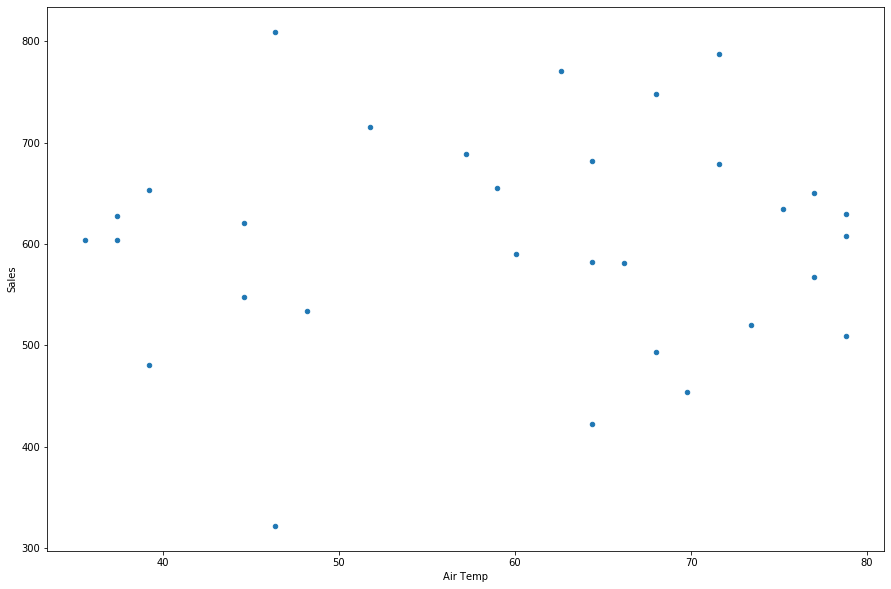

In [9]:
# Grab the data for only the 6pm hour.
data_6PM = merged_data.loc[merged_data['Date_Ending_Hour'].dt.hour == 18, :]
data_6PM.plot(kind='scatter', x='Air Temp', y='Sales', figsize=(15, 10))

#  Compare Daily Avg Temp vs Daily Avg Sales

In [11]:
day_temp_sales

,Air Temp,Sales
Date_Ending_Hour,,
2017-01-23,35.600000,420.000000
2017-02-05,47.171429,391.500000
2017-02-06,39.740000,502.500000
2017-02-07,39.200000,404.000000
2017-02-08,43.781818,439.181818
2017-02-09,57.380000,595.200000
2017-02-10,45.114286,650.428571
2017-02-11,38.660000,727.700000
2017-02-12,46.400000,238.250000


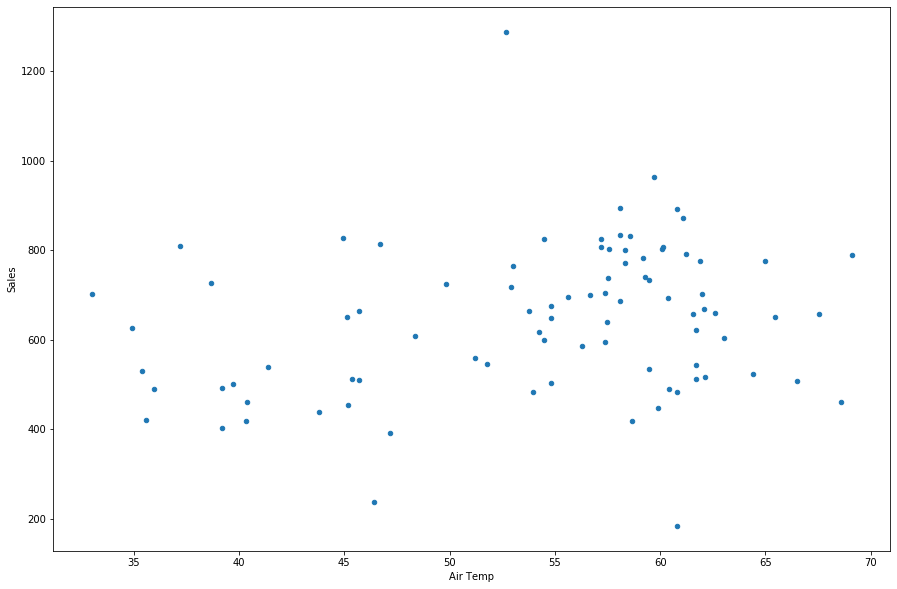

In [10]:
day_groups = merged_data.groupby(merged_data["Date_Ending_Hour"].dt.date)
day_temp_sales = day_groups.agg({'Air Temp': 'mean', 'Sales': 'mean'})
day_temp_sales.plot(kind='scatter', x='Air Temp', y='Sales', figsize=(15, 10))

## In Class Exercise:
Repeat the steps above, but for store 18065

In [15]:
store_groups = labor_sheet_data.groupby('Store_ID')

In [16]:
store_groups['Date_Ending_Hour'].min()

Store_ID
4462    2017-01-23 08:00:00
4587    2017-11-10 09:00:00
10523   2017-11-10 00:00:00
11794   2017-01-23 08:00:00
11969   2017-01-25 11:00:00
18065   2017-01-23 08:00:00
31225   2017-11-08 09:00:00
Name: Date_Ending_Hour, dtype: datetime64[ns]

In [17]:
store_groups['Date_Ending_Hour'].max()

Store_ID
4462    2018-07-29 01:00:00
4587    2018-07-29 01:00:00
10523   2018-07-29 01:00:00
11794   2018-07-28 18:00:00
11969   2018-07-29 01:00:00
18065   2018-07-28 22:00:00
31225   2018-07-28 23:00:00
Name: Date_Ending_Hour, dtype: datetime64[ns]

## Questions or Comments About This Notebook?
Feel free to contact me via my LinkedIn: https://www.linkedin.com/in/william-j-henry <br>
You can also email me at will@henryanalytics.com <br>